In [7]:
import pandas as pd 

In [8]:
df = pd.read_csv(r'C:\Users\arun8\Downloads\Nike_Sales_Uncleaned.csv')

In [9]:
print(df.dtypes)

Order_ID              int64
Gender_Category      object
Product_Line         object
Product_Name         object
Size                 object
Units_Sold          float64
MRP                 float64
Discount_Applied    float64
Revenue             float64
Order_Date           object
Sales_Channel        object
Region               object
Profit              float64
dtype: object


In [10]:
df.head()
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2500 non-null   int64  
 1   Gender_Category   2500 non-null   object 
 2   Product_Line      2500 non-null   object 
 3   Product_Name      2500 non-null   object 
 4   Size              1990 non-null   object 
 5   Units_Sold        1265 non-null   float64
 6   MRP               1246 non-null   float64
 7   Discount_Applied  832 non-null    float64
 8   Revenue           2500 non-null   float64
 9   Order_Date        1884 non-null   object 
 10  Sales_Channel     2500 non-null   object 
 11  Region            2500 non-null   object 
 12  Profit            2500 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 254.0+ KB


,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
count,2500.000000,2500,2500,2500,1990,1265.000000,1246.000000,832.000000,2500.000000,1884,2500,2500,2500.000000
unique,NaN,3,5,20,10,NaN,NaN,NaN,NaN,1008,2,9,NaN
top,NaN,Kids,Training,SuperRep Go,L,NaN,NaN,NaN,NaN,19-07-2025,Online,Delhi,NaN
freq,NaN,841,546,148,513,NaN,NaN,NaN,NaN,6,1255,438,NaN
mean,3194.352400,NaN,NaN,NaN,NaN,1.482213,6039.863395,0.631022,274.873716,NaN,NaN,NaN,1376.012848
std,749.972638,NaN,NaN,NaN,NaN,1.696947,2315.746826,0.365500,2023.773550,NaN,NaN,NaN,1478.671013
min,2000.000000,NaN,NaN,NaN,NaN,-1.000000,2006.630000,0.000000,-7561.590000,NaN,NaN,NaN,-1199.450000
25%,2534.750000,NaN,NaN,NaN,NaN,0.000000,4038.902500,0.320000,0.000000,NaN,NaN,NaN,93.532500
50%,3192.500000,NaN,NaN,NaN,NaN,2.000000,6110.030000,0.615000,0.000000,NaN,NaN,NaN,1371.385000
75%,3841.250000,NaN,NaN,NaN,NaN,3.000000,8022.187500,0.962500,0.000000,NaN,NaN,NaN,2660.645000


In [22]:
df.isnull().sum()
df.fillna({'region': 'Unknown'}, inplace=True)

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [25]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

In [47]:
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['discount_rate'] = df['discount_applied'] / 100

In [52]:
df = df[df['revenue'] > 0]

In [55]:
df['region'].value_counts()
df['product_line'].value_counts()

product_line
Training      29
Basketball    27
Soccer        25
Lifestyle     18
Running       14
Name: count, dtype: int64

In [54]:
print(df.columns.tolist())

['order_id', 'gender_category', 'product_line', 'product_name', 'size', 'units_sold', 'mrp', 'discount_applied', 'revenue', 'order_date', 'sales_channel', 'region', 'profit', 'month', 'year', 'discount_rate']


In [57]:
df.groupby('region')['revenue'].sum()
df.groupby(['region', 'product_line'])['revenue'].mean()

region     product_line
Bangalore  Basketball       2840.340000
           Lifestyle        8407.030000
           Running          6556.185000
           Soccer           7953.880000
           Training         6465.333333
Delhi      Basketball      12447.715000
           Lifestyle        6993.160000
           Running          3542.263333
           Soccer           6345.718333
           Training        10185.253333
Hyd        Basketball      10224.990000
Hyderabad  Basketball       9835.506667
           Training         2929.950000
Kolkata    Basketball       9437.462000
           Lifestyle       13393.475000
           Running          4483.430000
           Soccer           5168.623333
           Training         8506.376000
Mumbai     Basketball       2921.752500
           Lifestyle        5367.128000
           Running          3338.550000
           Soccer           5058.436667
           Training         5873.546250
Pune       Basketball       3971.606667
           Lifes

In [59]:
df.pivot_table(index='region', columns='month', values='revenue', aggfunc='sum')
df.corr(numeric_only=True)

,order_id,units_sold,mrp,discount_applied,revenue,profit,month,year,discount_rate
order_id,1.000000,0.062109,-0.132640,-0.002567,0.056841,0.060901,-0.216525,0.125664,-0.002567
units_sold,0.062109,1.000000,-0.106628,-0.040723,0.471843,0.051777,-0.100689,0.037690,-0.040723
mrp,-0.132640,-0.106628,1.000000,0.031035,0.328356,-0.079074,-0.181120,0.104735,0.031035
discount_applied,-0.002567,-0.040723,0.031035,1.000000,-0.605058,-0.234233,-0.391345,0.353236,1.000000
revenue,0.056841,0.471843,0.328356,-0.605058,1.000000,0.096847,0.125294,-0.252075,-0.605058
profit,0.060901,0.051777,-0.079074,-0.234233,0.096847,1.000000,0.167139,0.032958,-0.234233
month,-0.216525,-0.100689,-0.181120,-0.391345,0.125294,0.167139,1.000000,-0.665591,-0.391345
year,0.125664,0.037690,0.104735,0.353236,-0.252075,0.032958,-0.665591,1.000000,0.353236
discount_rate,-0.002567,-0.040723,0.031035,1.000000,-0.605058,-0.234233,-0.391345,0.353236,1.000000


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

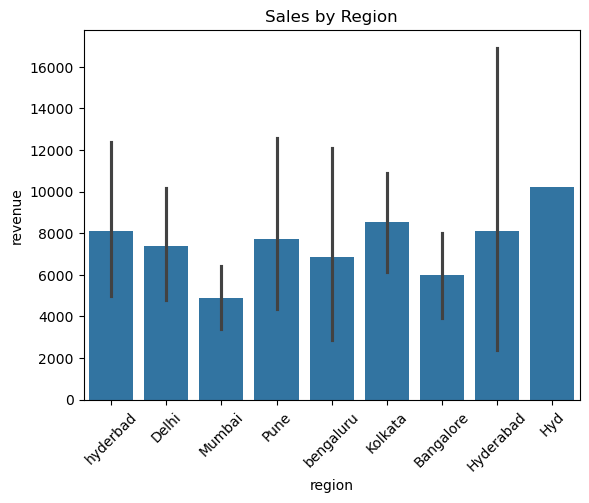

In [61]:
sns.barplot(x='region', y='revenue', data=df)
plt.title('Sales by Region')
plt.xticks(rotation=45)
plt.show()


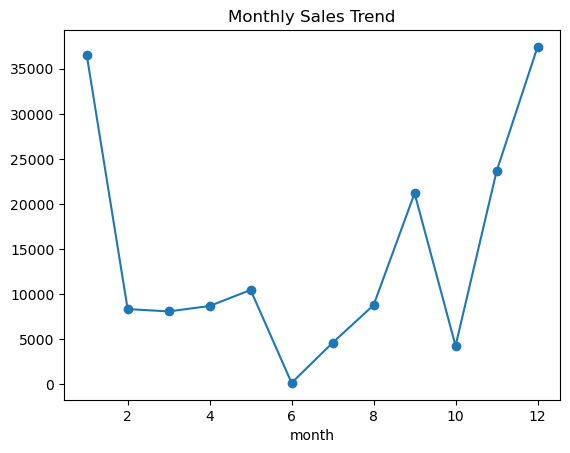

In [62]:
monthly_sales = df.groupby('month')['revenue'].sum()
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend')
plt.show()

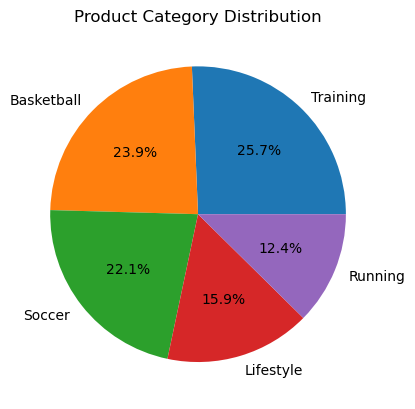

In [64]:
df['product_line'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Product Category Distribution')
plt.ylabel('')
plt.show()

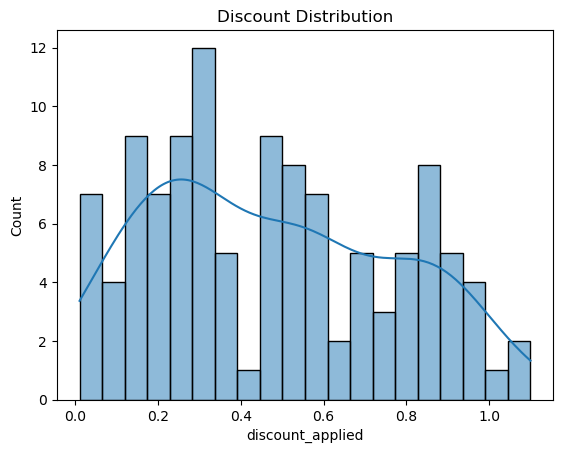

In [66]:
sns.histplot(df['discount_applied'], bins=20, kde=True)
plt.title('Discount Distribution')
plt.show()

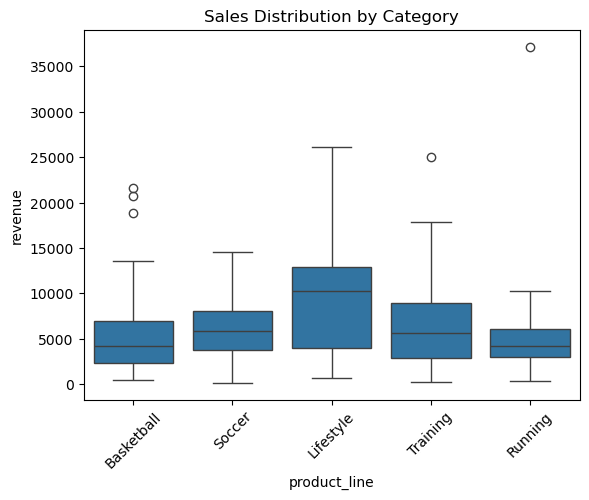

In [67]:
sns.boxplot(x='product_line', y='revenue', data=df)
plt.title('Sales Distribution by Category')
plt.xticks(rotation=45)
plt.show()

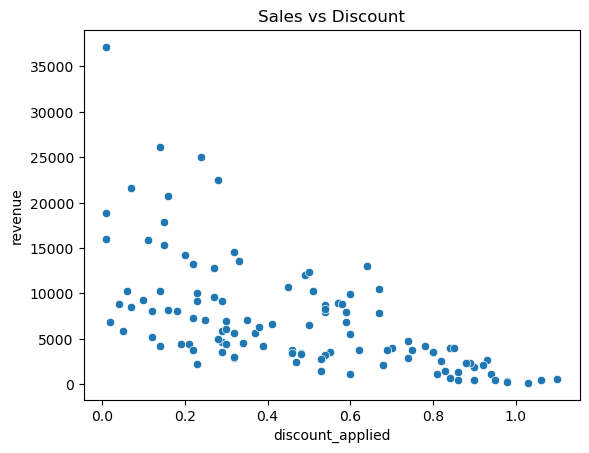

In [68]:
sns.scatterplot(x='discount_applied', y='revenue', data=df)
plt.title('Sales vs Discount')
plt.show()

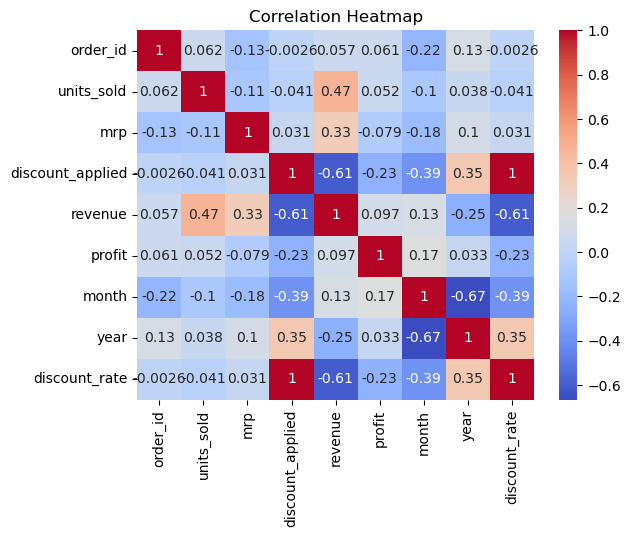

In [69]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

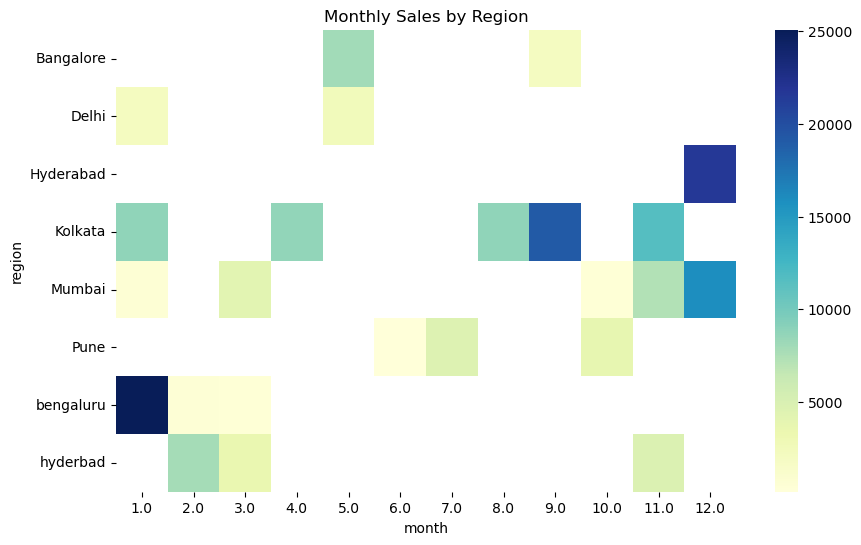

In [71]:
fig, ax = plt.subplots(figsize=(10,6))
pivot = df.pivot_table(index='region', columns='month', values='revenue', aggfunc='sum')
sns.heatmap(pivot, cmap='YlGnBu', ax=ax)
plt.title('Monthly Sales by Region')
plt.show()